# Acinar size
This document is used to plot the acinar sizes (data from Tiziana) as separate (box)plots for each animal.
We got two data sheets from Tiziana.
The first one is a [GraphPad Prism](http://www.graphpad.com/scientific-software/prism/) data sheet, from which we exported the data to two [CSV](https://en.wikipedia.org/wiki/Comma-separated_values)-files which are in this folder.

In [1]:
#Load the data and set up notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
# Display defaults
plt.rc('image', cmap='gray', interpolation='nearest') # Display all images in b&w
plt.rcParams['figure.figsize'] = (16, 9)  # Size up figures a bit

In [3]:
# Get data for *all* acini
allcounts = pd.read_csv('volume.csv')
allcounts.describe()

/home/habi/miniconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,4,4.1,4.2,4.3,4.4,10,10.1,10.2,10.3,10.4,...,36,36.1,36.2,36.3,36.4,60,60.1,60.2,60.3,60.4
count,44.000000,42.000000,47.000000,25.000000,51.000000,32.000000,66.000000,34.000000,33.000000,26.000000,...,54.000000,25.000000,30.000000,0.0,0.0,41.000000,25.000000,10.000000,8.000000,0.0
mean,0.024475,0.011094,0.005964,0.041590,0.028898,0.010791,0.030997,0.019566,0.017322,0.017739,...,0.105851,0.114701,0.098864,NaN,NaN,0.039036,0.319807,0.434013,0.495890,NaN
std,0.023928,0.009508,0.005274,0.049283,0.024524,0.007641,0.038528,0.012316,0.011901,0.014309,...,0.075128,0.081199,0.098033,NaN,NaN,0.029254,0.129922,0.128309,0.211367,NaN
min,0.003994,0.001216,0.001160,0.006500,0.004333,0.002034,0.001266,0.005223,0.002228,0.003091,...,0.013257,0.024564,0.011037,NaN,NaN,0.005616,0.133954,0.232298,0.124868,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,0.108391,0.046470,0.021516,0.215823,0.134680,0.030101,0.171791,0.053397,0.049147,0.051696,...,0.394578,0.381259,0.522053,NaN,NaN,0.130595,0.667457,0.590029,0.752025,NaN


In [4]:
# Get data for only the acini that eveline counted
eveline = pd.read_csv('evelinevolume.csv')
eveline.describe()

/home/habi/miniconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,4,4.1,4.2,4.3,4.4,10,10.1,10.2,10.3,10.4,...,36,36.1,36.2,36.3,36.4,60,60.1,60.2,60.3,60.4
count,0.0,0.0,47.000000,25.000000,51.000000,0.0,17.000000,0.0,27.000000,13.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,25.000000,10.000000,8.000000,0.0
mean,NaN,NaN,0.005964,0.041590,0.028898,NaN,0.032673,NaN,0.018910,0.019471,...,NaN,NaN,NaN,NaN,NaN,NaN,0.319807,0.434013,0.495890,NaN
std,NaN,NaN,0.005274,0.049283,0.024524,NaN,0.045271,NaN,0.012165,0.015253,...,NaN,NaN,NaN,NaN,NaN,NaN,0.129922,0.128309,0.211367,NaN
min,NaN,NaN,0.001160,0.006500,0.004333,NaN,0.001703,NaN,0.003015,0.003192,...,NaN,NaN,NaN,NaN,NaN,NaN,0.133954,0.232298,0.124868,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,0.021516,0.215823,0.134680,NaN,0.171791,NaN,0.049147,0.046689,...,NaN,NaN,NaN,NaN,NaN,NaN,0.667457,0.590029,0.752025,NaN


In [5]:
# Generate a color palette to distinguish between postnatal days
daycolor = [None] * len(allcounts.columns.values)
day = [None] * len(allcounts.columns.values)
for c,i in enumerate(allcounts.columns.values):
    if int(i.split('.')[0])==4:
        day[c] = 4
        daycolor[c] = sns.color_palette()[0]
    elif int(i.split('.')[0])==10:
        day[c] = 10
        daycolor[c] = sns.color_palette()[1]
    elif int(i.split('.')[0])==21:
        day[c] = 21
        daycolor[c] = sns.color_palette()[2]
    elif int(i.split('.')[0])==36:
        day[c] = 36
        daycolor[c] = sns.color_palette()[3]
    else:
        day[c] = 60
        daycolor[c] = sns.color_palette()[4]

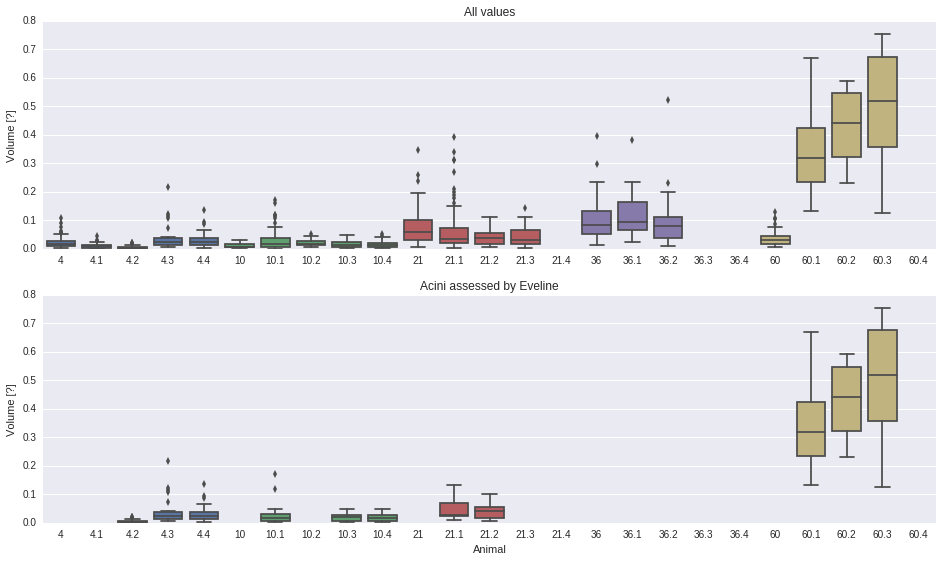

In [6]:
plt.subplot(211)
sns.boxplot(data=allcounts, palette=daycolor)
plt.title('All values')
plt.ylabel('Volume [?]')
plt.subplot(212)
sns.boxplot(data=eveline, palette=daycolor)
plt.title('Acini assessed by Eveline')
plt.xlabel('Animal')
plt.ylabel('Volume [?]')
plt.show()

# Bridges
Eveline also counted the [*bridges*](http://www.stereology.info/connectivity/) in the datasets.
Tiziana cleaned this data up and saved it to an Excel file (`acini merge.xlsx`).
We've made the file a bit more consistent (removing empty columns and rows, naming columns consistently, etc.) and work with this file (`acini merge_edit.xlsx`) below.

Below we load this file and calculate the number of acini according to [our paper for day 60](http://jap.physiology.org/content/115/9/1379).
The calculation for this paper was done in [MATLAB](https://www.mathworks.com/products/matlab.html)/[R](https://www.r-project.org/), nowadays I'm more handy with Python...

I was not able to find the original calculation script on the ana.unibe.ch network drives, but I seem to have saved a copy of the calculation and insertion to the [LaTeX](https://www.latex-project.org/) manuscript file in a *very* old [GitHub repository here](https://github.com/habi/AcinusPaperCode/blob/master/AcinarSize/ReadVolumeSurfaceAndAlveaolarNumber.py).

In [7]:
DataFile = pd.ExcelFile('acini merge_edit.xlsx')
print('The excel file contains the sheets:', end=' ')
for i in DataFile.sheet_names:
    print(i,end=', ')

The excel file contains the sheets: D04, D10, D21, D60, 

In [8]:
# Read the single sheets of the XLS file each into a dataframe
D04 = DataFile.parse(DataFile.sheet_names[0])
D10 = DataFile.parse(DataFile.sheet_names[1])
D21 = DataFile.parse(DataFile.sheet_names[2])
D60 = DataFile.parse(DataFile.sheet_names[3])

In [9]:
# Rename 'Counts' to 'Counts.0' (we use the Counts counter later on)
D04.rename(columns={'Counts':'Counts.0'}, inplace=True)
D10.rename(columns={'Counts':'Counts.0'}, inplace=True)
D21.rename(columns={'Counts':'Counts.0'}, inplace=True)
D60.rename(columns={'Counts':'Counts.0'}, inplace=True)

In [10]:
# For D60, Eveline counted only half of the images, we thus double the counts for this day.
print('Original D60')
print(D60.head())
for i in range(3):
    D60.iloc[:,2*i+1] =  D60.iloc[:,2*i+1] * 2
print('\nDouble the counts for D60')    
print(D60.head())    

Original D60
   R108C60Dt  Counts.0  R108C60B  Counts.1  R108C60Et  Counts.2
0   0.590029     591.0  0.377313       341   0.670989     608.0
1   0.553714     375.0  0.199655       248   0.363251     368.0
2   0.299865     369.0  0.254478       364   0.124868     136.0
3   0.390141     277.0  0.433835       462   0.511632     370.0
4   0.293070     281.0  0.318370       365   0.752025     385.0

Double the counts for D60
   R108C60Dt  Counts.0  R108C60B  Counts.1  R108C60Et  Counts.2
0   0.590029    1182.0  0.377313       682   0.670989    1216.0
1   0.553714     750.0  0.199655       496   0.363251     736.0
2   0.299865     738.0  0.254478       728   0.124868     272.0
3   0.390141     554.0  0.433835       924   0.511632     740.0
4   0.293070     562.0  0.318370       730   0.752025     770.0


We plot the data as [notched](https://en.wikipedia.org/wiki/Box_plot#Variations) boxplots.
The notches give a rough guide to the significance of difference of medians; if the notches of two boxes do not overlap, this offers evidence of a statistically significant difference between the medians.
On top of the boxplots we do a jittered scatterplot of the datapoints, to see the distribution of the data points.

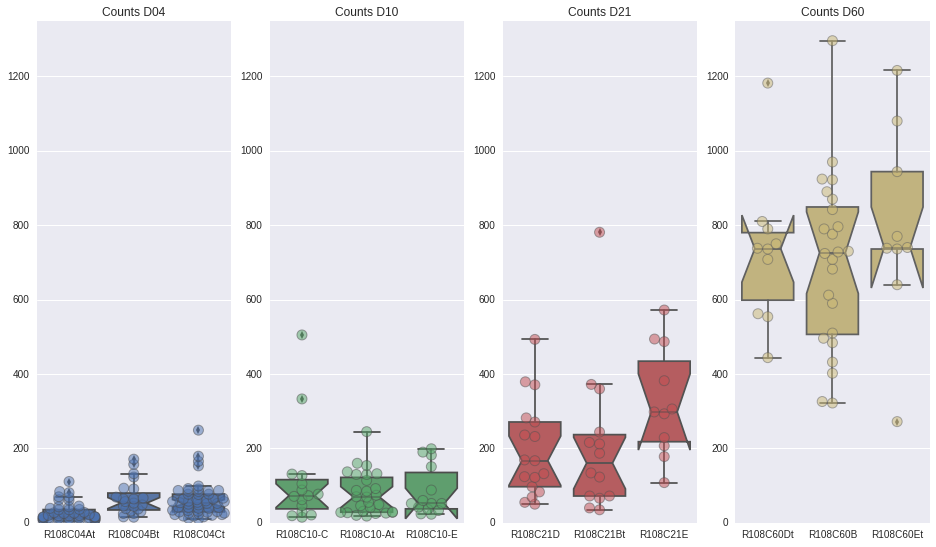

In [11]:
#Plot the 'counts' from Eveline
upper_limit=1350
plt.subplot(141)
sns.boxplot(data=D04.iloc[:,[1,3,5]], color=sns.color_palette()[0], notch=True)
sns.swarmplot(data=D04.iloc[:,[1,3,5]], color=sns.color_palette()[0], size=10, facecolor='k', linewidth=1, alpha=0.5)
plt.ylim([0,upper_limit])
plt.xticks(range(3), [list(D04)[0], list(D04)[2], list(D04)[4]])
plt.title('Counts D04')
plt.subplot(142)
sns.boxplot(data=D10.iloc[:,[1,3,5]], color=sns.color_palette()[1], notch=True)
sns.swarmplot(data=D10.iloc[:,[1,3,5]], color=sns.color_palette()[1], size=10, facecolor='k', linewidth=1, alpha=0.5)
plt.ylim([0,upper_limit])
plt.xticks(range(3), [list(D10)[0], list(D10)[2], list(D10)[4]])
plt.title('Counts D10')
plt.subplot(143)
sns.boxplot(data=D21.iloc[:,[1,3,5]], color=sns.color_palette()[2], notch=True)
sns.swarmplot(data=D21.iloc[:,[1,3,5]], color=sns.color_palette()[2], size=10, facecolor='k', linewidth=1, alpha=0.5)
plt.ylim([0,upper_limit])
plt.xticks(range(3), [list(D21)[0], list(D21)[2], list(D21)[4]])
plt.title('Counts D21')
plt.subplot(144)
sns.boxplot(data=D60.iloc[:,[1,3,5]], color=sns.color_palette()[4], notch=True)
sns.swarmplot(data=D60.iloc[:,[1,3,5]], color=sns.color_palette()[4], size=10, facecolor='k', linewidth=1, alpha=0.5)
plt.ylim([0,upper_limit])
plt.xticks(range(3), [list(D60)[0], list(D60)[2], list(D60)[4]])
plt.title('Counts D60')
plt.show()

In [12]:
# Divide the volume by the counts, add this as a column to the dataframes
for i in range(3):
    D04['Ratio.%s' % i] =  D04.iloc[:,2*i+1]/D04.iloc[:,2*i]
    D10['Ratio.%s' % i] =  D10.iloc[:,2*i+1]/D10.iloc[:,2*i]
    D21['Ratio.%s' % i] =  D21.iloc[:,2*i+1]/D21.iloc[:,2*i]
    D60['Ratio.%s' % i] =  D60.iloc[:,2*i+1]/D60.iloc[:,2*i]

In [13]:
D04.head()

,R108C04At,Counts.0,R108C04Bt,Counts.1,R108C04Ct,Counts.2,Ratio.0,Ratio.1,Ratio.2
0,0.003291,11.0,0.042494,93.0,0.012942,26,3342.695921,2188.558171,2009.017397
1,0.001651,6.0,0.016435,64.0,0.013508,29,3634.434082,3894.102321,2146.866389
2,0.005865,26.0,0.029270,57.0,0.031256,59,4432.999727,1947.364447,1887.621268
3,0.009529,28.0,0.014718,38.0,0.022831,66,2938.365578,2581.937445,2890.867137
4,0.005811,16.0,0.018338,69.0,0.046084,92,2753.421470,3762.664228,1996.351018


In [14]:
D10.head()

,R108C10-C,Counts.0,R108C10-At,Counts.1,R108C10-E,Counts.2,Ratio.0,Ratio.1,Ratio.2
0,0.171791,505.0,0.033524,137,0.046689,190.0,2939.623623,4086.602566,4069.438325
1,0.031538,88.0,0.006564,18,0.040887,182.0,2790.319241,2742.194838,4451.265370
2,0.026587,127.0,0.025686,70,0.016694,52.0,4776.759822,2725.264526,3114.923298
3,0.007853,46.0,0.025693,69,0.005771,42.0,5857.385648,2685.551151,7277.881651
4,0.018037,77.0,0.006716,29,0.028138,88.0,4268.898469,4318.074103,3127.427755


In [15]:
D21.head()

,R108C21D,Counts.0,R108C21Bt,Counts.1,R108C21E,Counts.2,Ratio.0,Ratio.1,Ratio.2
0,0.074702,236,0.050063,216.0,0.118694,572.0,3159.214646,4314.542966,4819.130939
1,0.058089,232,0.015344,72.0,0.016477,108.0,3993.886599,4692.259466,6554.666832
2,0.703024,271,0.007461,40.0,0.061948,298.0,385.477610,5361.511292,4810.501745
3,0.209349,493,0.046025,187.0,0.051789,293.0,2354.918735,4062.976571,5657.570979
4,0.033545,122,0.009488,35.0,0.101070,487.0,3636.894807,3689.020932,4818.456966


In [16]:
D60.head()

,R108C60Dt,Counts.0,R108C60B,Counts.1,R108C60Et,Counts.2,Ratio.0,Ratio.1,Ratio.2
0,0.590029,1182.0,0.377313,682,0.670989,1216.0,2003.290345,1807.518375,1812.250816
1,0.553714,750.0,0.199655,496,0.363251,736.0,1354.489129,2484.282904,2026.147767
2,0.299865,738.0,0.254478,728,0.124868,272.0,2461.108319,2860.759225,2178.291563
3,0.390141,554.0,0.433835,924,0.511632,740.0,1419.998344,2129.843954,1446.352631
4,0.293070,562.0,0.318370,730,0.752025,770.0,1917.629946,2292.926729,1023.901995


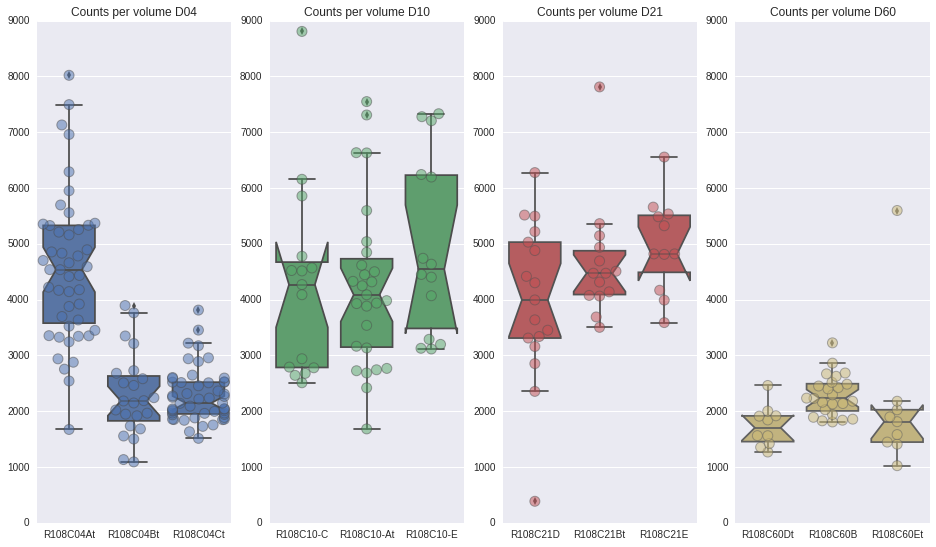

In [17]:
# Plot the 'count per volume' ratio
upper_limit = 9e3
plt.subplot(141)
sns.boxplot(data=D04.iloc[:,[6,7,8]], color=sns.color_palette()[0], notch=True)
sns.swarmplot(data=D04.iloc[:,[6,7,8]], color=sns.color_palette()[0], size=10, facecolor='k', linewidth=1, alpha=0.5)
plt.ylim([0,upper_limit])
plt.xticks(range(3), [list(D04)[0], list(D04)[2], list(D04)[4]])
plt.title('Counts per volume D04')
plt.subplot(142)
sns.boxplot(data=D10.iloc[:,[6,7,8]], color=sns.color_palette()[1], notch=True)
sns.swarmplot(data=D10.iloc[:,[6,7,8]], color=sns.color_palette()[1], size=10, facecolor='k', linewidth=1, alpha=0.5)
plt.ylim([0,upper_limit])
plt.xticks(range(3), [list(D10)[0], list(D10)[2], list(D10)[4]])
plt.title('Counts per volume D10')
plt.subplot(143)
sns.boxplot(data=D21.iloc[:,[6,7,8]], color=sns.color_palette()[2], notch=True)
sns.swarmplot(data=D21.iloc[:,[6,7,8]], color=sns.color_palette()[2], size=10, facecolor='k', linewidth=1, alpha=0.5)
plt.ylim([0,upper_limit])
plt.xticks(range(3), [list(D21)[0], list(D21)[2], list(D21)[4]])
plt.title('Counts per volume D21')
plt.subplot(144)
sns.boxplot(data=D60.iloc[:,[6,7,8]], color=sns.color_palette()[4], notch=True)
sns.swarmplot(data=D60.iloc[:,[6,7,8]], color=sns.color_palette()[4], size=10, facecolor='k', linewidth=1, alpha=0.5)
plt.ylim([0,upper_limit])
plt.xticks(range(3), [list(D60)[0], list(D60)[2], list(D60)[4]])
plt.title('Counts per volume D60')
plt.show()

In [18]:
# Setup (copied verbatim lot from (ReadVolumeSurfaceAndAlveaolarNumber.py)
TOMCATVoxelSize = 1.48
SliceNumber = 10  # every $SliceNumber slice was exported, thus needed for scaling 
DisectorThickness = 5 # slices
ShrinkageFactor = 0.61 # Volume-Shrinkage-Factor = 61% with STD=5, calculated by Sébastien: Volume TOMCAT / Waterdisplacement

In [19]:
# Hsiah2010 p. 407:
# Counting the number of entrance rings in paired sections by the disector
# technique allows estimation of total number of alveoli in the lung N(a,L) (112, 113).
# N(a,L) is the product of the number of alveolar openings per unit parenchyma
# volume (Sn/Vp) with the volume density of parenchyma per unit lung volume VV(p,L)
# and the absolute lung volume:
# N(a,L,) = (Sn/Vp) * VV(p,L) * V(L) (Formula 17)

In [20]:
# We need the 'Area_Vol' from the STEPanizer-Files, it's in the line where we have 'a(p)'
# Area_Vol = double(line[1])*STEPanizerPixelSize_Vol**2
# We need the STEPanizer pixel size, it's in the line where we have 'Pixel size'
STEPanizerPixelSize_Vol = 3.
print('GET CORRECT AREA_VOL')
Area_Vol = 2. * STEPanizerPixelSize_Vol**2
AcinusTestPoints = 15


# Volume = AcinusTestPoints * Area_Vol * STEPanizerPixelSize_Vol * SliceNumber * TOMCATVoxelSize		
AcinarVolumeSTEPanizer = (((AcinusTestPoints *
                            Area_Vol *
                            STEPanizerPixelSize_Vol *
                            SliceNumber *
                            TOMCATVoxelSize ) /
                           ShrinkageFactor ) / 1e12 ) # scaling volume to cm^3: http://is.gd/wbZ81O

GET CORRECT AREA_VOL


In [21]:
# We need the 'Area_Alveoli' from the STEPanizer-Files, it's in the line where we have 'a(p)'
# We need the STEPanizer pixel size, it's in the line where we have 'Pixel size'
STEPanizerPixelSize_Alveoli = 3.
print('GET CORRECT AREA_VOL')
Area_Alveoli = 2. * STEPanizerPixelSize_Alveoli**2
Counts = 15
# Counts are *all* counted bridges, (from a to b and from b to a). According 
# to Stefan, we thus have to double the disector volume. This is then the 
# volume density of the counts in said acinus.

# From Evelyne we get the Counts per volume, see above.
# These values go into the 'AlveolarFraction'
# This is then multiplied by the volume of the acinus to get the number of alveoli in each acinus.
# The volume is taken from the 'allcounts' or 'eveline' dataframes at the beginning.

# AlveolarFraction = Counts / ( ( Area_Alveoli * ( DisectorThickness / ShrinkageFactor ) ) * 2 ) * 1e12 # Counts/cm^3
# DisectorThickness = um, Area_Alveoli = um^2 -> 10^12 um^3 = 1 cm^3: http://is.gd/Cr6kUL
for i in range(3):
    D04['Alveolar fraction.%s' % i] = D04['Counts.%s' % i] / ((Area_Alveoli * (DisectorThickness / ShrinkageFactor)) * 2) * 1e12 # Counts/cm^3
    D10['Alveolar fraction.%s' % i] = D04['Counts.%s' % i] / ((Area_Alveoli * (DisectorThickness / ShrinkageFactor)) * 2) * 1e12 # Counts/cm^3
    D21['Alveolar fraction.%s' % i] = D04['Counts.%s' % i] / ((Area_Alveoli * (DisectorThickness / ShrinkageFactor)) * 2) * 1e12 # Counts/cm^3
    D60['Alveolar fraction.%s' % i] = D04['Counts.%s' % i] / ((Area_Alveoli * (DisectorThickness / ShrinkageFactor)) * 2) * 1e12 # Counts/cm^3

# NumberOfAlveoli = AlveolarFraction * AcinarVolumeSTEPanizer
for i in range(3):
    D04['NumAlveoli.%s' % i] = D04.iloc[:,2*i] * D04['Alveolar fraction.%s' % i]
    D10['NumAlveoli.%s' % i] = D10.iloc[:,2*i] * D10['Alveolar fraction.%s' % i]
    D21['NumAlveoli.%s' % i] = D21.iloc[:,2*i] * D21['Alveolar fraction.%s' % i]
    D60['NumAlveoli.%s' % i] = D60.iloc[:,2*i] * D60['Alveolar fraction.%s' % i]

GET CORRECT AREA_VOL


In [22]:
D04.head()

,R108C04At,Counts.0,R108C04Bt,Counts.1,R108C04Ct,Counts.2,Ratio.0,Ratio.1,Ratio.2,Alveolar fraction.0,Alveolar fraction.1,Alveolar fraction.2,NumAlveoli.0,NumAlveoli.1,NumAlveoli.2
0,0.003291,11.0,0.042494,93.0,0.012942,26,3342.695921,2188.558171,2009.017397,3.727778e+10,3.151667e+11,8.811111e+10,1.226721e+08,1.339261e+10,1.140303e+09
1,0.001651,6.0,0.016435,64.0,0.013508,29,3634.434082,3894.102321,2146.866389,2.033333e+10,2.168889e+11,9.827778e+10,3.356781e+07,3.564593e+09,1.327542e+09
2,0.005865,26.0,0.029270,57.0,0.031256,59,4432.999727,1947.364447,1887.621268,8.811111e+10,1.931667e+11,1.999444e+11,5.167807e+08,5.654052e+09,6.249518e+09
3,0.009529,28.0,0.014718,38.0,0.022831,66,2938.365578,2581.937445,2890.867137,9.488889e+10,1.287778e+11,2.236667e+11,9.042064e+08,1.895304e+09,5.106426e+09
4,0.005811,16.0,0.018338,69.0,0.046084,92,2753.421470,3762.664228,1996.351018,5.422222e+10,2.338333e+11,3.117778e+11,3.150827e+08,4.288052e+09,1.436799e+10


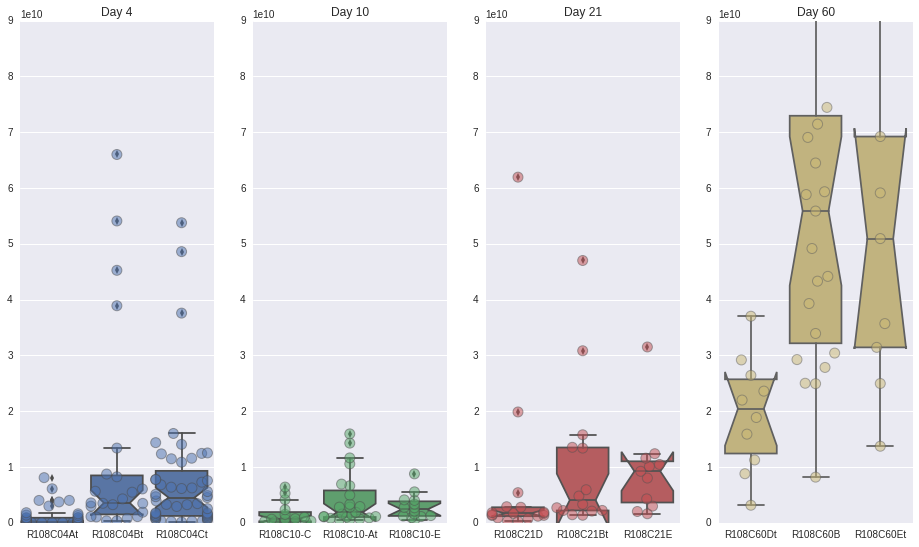

In [23]:
ymax = 9e10
plt.subplot(141)
sns.boxplot(data=D04.iloc[:,-3:], color=sns.color_palette()[0], notch=True)
sns.swarmplot(data=D04.iloc[:,-3:], color=sns.color_palette()[0], size=10, facecolor='k', linewidth=1, alpha=0.5)
plt.ylim([0, ymax])
plt.xticks(range(3), [list(D04)[0], list(D04)[2], list(D04)[4]])
plt.title('Day 4')
plt.subplot(142)
sns.boxplot(data=D10.iloc[:,-3:], color=sns.color_palette()[1], notch=True)
sns.swarmplot(data=D10.iloc[:,-3:], color=sns.color_palette()[1], size=10, facecolor='k', linewidth=1, alpha=0.5)
plt.ylim([0, ymax])
plt.xticks(range(3), [list(D10)[0], list(D10)[2], list(D10)[4]])
plt.title('Day 10')
plt.subplot(143)
sns.boxplot(data=D21.iloc[:,-3:], color=sns.color_palette()[2], notch=True)
sns.swarmplot(data=D21.iloc[:,-3:], color=sns.color_palette()[2], size=10, facecolor='k', linewidth=1, alpha=0.5)
plt.ylim([0, ymax])
plt.xticks(range(3), [list(D21)[0], list(D21)[2], list(D21)[4]])
plt.title('Day 21')
plt.subplot(144)
sns.boxplot(data=D60.iloc[:,-3:], color=sns.color_palette()[4], notch=True)
sns.swarmplot(data=D60.iloc[:,-3:], color=sns.color_palette()[4], size=10, facecolor='k', linewidth=1, alpha=0.5)
plt.ylim([0, ymax])
plt.xticks(range(3), [list(D60)[0], list(D60)[2], list(D60)[4]])
plt.title('Day 60')
plt.show()